### Objective

<br>
The main goal of the problem is to develop a machine learning algorithm that predicts the scout-made evaluation of players in the context of given matches.


You are provided the Sevilla FC and FC Bengaluru United large scouting dataset containing the players, teams, and opponent's performance in terms of physical, kinematical, technical, and tactical variables.

Every row of the dataset corresponds to the evaluation of a player in a given match together with variables related to the player, match, team, and opponent and the rating of a player in a match given by a scout.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,row_id,scout_id,rating_num,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,...,team2_defensive_derived_var_10,team2_offensive_derived_var_11,team2_offensive_derived_var_12,team2_offensive_derived_var_13,team2_offensive_derived_var_14,team2_defensive_derived_var_15,team2_offensive_derived_var_16,team2_defensive_derived_var_17,team2_offensive_derived_var_18,team2_offensive_derived_var_19
0,1,13,7.0,winner,team1,8,7.0,7.0,0.317073,0.48,...,0.193658,0.131548,0.097131,0.600944,0.338892,0.347980,0.034157,0.288962,0.310727,0.204925
1,3,16,6.5,loser,team2,8,3.0,9.0,0.463415,0.42,...,0.190500,0.173697,0.272801,0.605659,0.526761,0.468976,0.054034,0.334962,0.380073,0.295392
2,4,4,8.5,loser,team1,5,11.0,11.0,0.682927,0.44,...,0.312314,0.250756,0.212631,0.558833,0.686523,0.441749,0.219441,0.414288,0.570757,0.437500
3,5,13,8.0,loser,team2,4,17.0,17.0,0.682927,0.58,...,0.282556,0.155969,0.206503,0.533002,0.373959,0.527733,0.095201,0.423040,0.330754,0.235558
4,7,11,3.5,draw,team1,5,10.0,10.0,0.731707,0.70,...,0.450453,0.199050,0.134002,0.688773,0.681724,0.733625,0.128719,0.448360,0.444946,0.312500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20448,29221,14,5.0,draw,team2,14,NaN,NaN,0.439024,0.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20449,29223,3,6.0,winner,team2,11,4.0,4.0,0.390244,0.32,...,0.362193,0.240326,0.369752,0.438649,0.381099,0.264074,0.171927,0.422975,0.588501,0.534694
20450,29224,4,5.0,loser,team1,7,5.0,5.0,0.268293,0.30,...,0.341322,0.248870,0.240096,0.515025,0.694587,0.869000,0.296820,0.511550,0.548315,0.385927
20451,29226,13,6.0,loser,team1,8,5.0,5.0,0.463415,0.46,...,0.215831,0.190395,0.207007,0.631279,0.330606,0.322158,0.108018,0.333229,0.349177,0.458685


In [4]:
df.describe()

,row_id,scout_id,rating_num,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_0,player_general_var_1,...,team2_defensive_derived_var_10,team2_offensive_derived_var_11,team2_offensive_derived_var_12,team2_offensive_derived_var_13,team2_offensive_derived_var_14,team2_defensive_derived_var_15,team2_offensive_derived_var_16,team2_defensive_derived_var_17,team2_offensive_derived_var_18,team2_offensive_derived_var_19
count,20453.000000,20453.000000,20453.000000,20453.000000,20378.000000,20378.000000,20451.000000,20451.000000,20453.000000,20453.000000,...,19026.000000,20332.000000,19019.000000,19021.000000,19026.000000,19026.000000,19026.000000,19026.000000,19026.000000,19026.000000
mean,14257.557033,10.023566,6.887303,7.311837,7.609481,8.012612,0.496925,0.455471,0.029717,0.003276,...,0.350022,0.179766,0.253738,0.582760,0.480930,0.497442,0.113251,0.424523,0.420103,0.333038
std,8353.543104,5.712044,1.852367,2.345699,5.059591,4.913142,0.160769,0.140848,0.082089,0.057142,...,0.140589,0.059541,0.138928,0.150763,0.163294,0.135420,0.061303,0.098739,0.121958,0.143902
min,1.000000,1.000000,0.000000,4.000000,1.000000,1.000000,0.024390,0.040000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046945,0.000000,0.044144,0.000000,0.000000
25%,7048.000000,3.000000,6.000000,5.000000,3.000000,3.000000,0.390244,0.340000,0.000000,0.000000,...,0.246247,0.158557,0.153925,0.485600,0.365868,0.410089,0.068929,0.357223,0.333557,0.235558
50%,14093.000000,12.000000,6.500000,7.000000,7.000000,8.000000,0.512195,0.440000,0.000000,0.000000,...,0.339490,0.184254,0.239381,0.592093,0.479270,0.499538,0.102904,0.421710,0.420148,0.320256
75%,21381.000000,15.000000,8.000000,9.000000,11.000000,11.000000,0.609756,0.540000,0.000000,0.000000,...,0.431876,0.215570,0.338749,0.691803,0.596090,0.594952,0.149055,0.489914,0.507056,0.425171
max,29227.000000,26.000000,10.000000,15.000000,23.000000,23.000000,0.975610,1.000000,1.000000,1.000000,...,0.962835,1.000000,1.000000,1.000000,0.989602,0.977524,1.000000,1.000000,1.000000,1.000000


In [5]:
df.rating_num.value_counts()

6.0     3654
6.5     3247
7.5     3206
10.0    2442
5.0     2244
7.0     1248
3.5     1077
8.5     1062
9.0     1023
8.0      873
0.0      218
3.0      110
2.0       49
Name: rating_num, dtype: int64

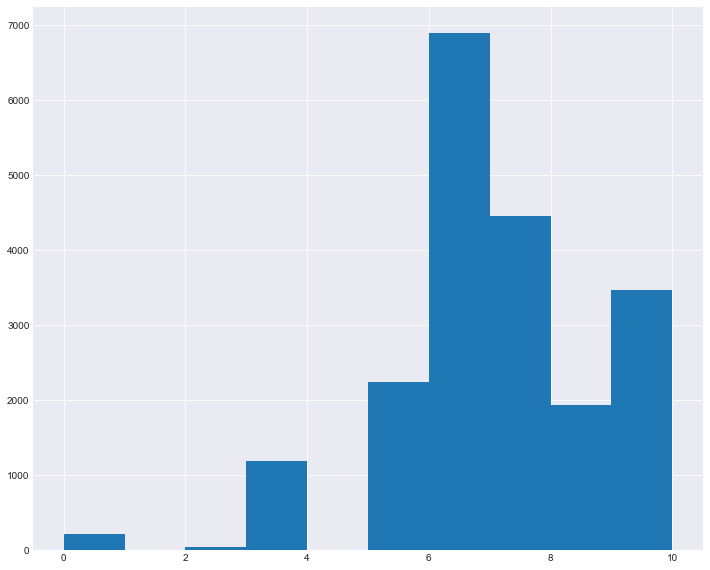

In [6]:
plt.style.use('seaborn-darkgrid')
ax , fig = plt.subplots(figsize=(12,10))
ax = plt.hist(df.rating_num, bins=10)

C:\Users\Hamza\Desktop\footbal_hackathon\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


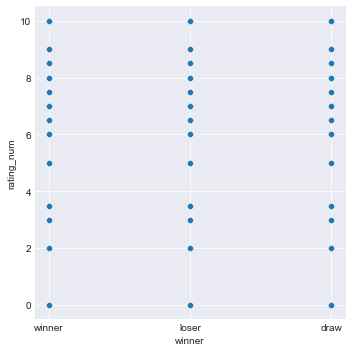

In [7]:

sns.relplot(df.winner, df.rating_num)


C:\Users\Hamza\Desktop\footbal_hackathon\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


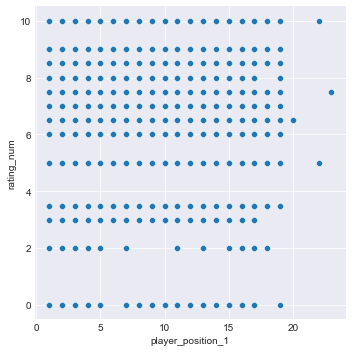

In [8]:
sns.relplot(df.player_position_1, df.rating_num)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20453 entries, 0 to 20452
Columns: 800 entries, row_id to team2_offensive_derived_var_19
dtypes: float64(794), int64(4), object(2)
memory usage: 124.8+ MB


#### filling missing values


In [10]:
df.isna().sum()

row_id                               0
scout_id                             0
rating_num                           0
winner                               0
team                                 0
                                  ... 
team2_defensive_derived_var_15    1427
team2_offensive_derived_var_16    1427
team2_defensive_derived_var_17    1427
team2_offensive_derived_var_18    1427
team2_offensive_derived_var_19    1427
Length: 800, dtype: int64

In [11]:
df['team2_defensive_derived_var_9'].min()

0.0

In [12]:

df.player_position_2.isna().sum()

75

In [13]:

df.player_position_1.fillna(df.player_position_1.median(), inplace = True)